In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.7 MB/s eta 0:00:00


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from datasets import load_dataset
import torchvision.transforms as transforms
from torchvision import datasets
from torchvision.utils import save_image

# Define the Generator Model
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(latent_dim, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, 28 * 28)  # MNIST image size
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, z):
        x = self.relu(self.fc1(z))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.tanh(self.fc4(x))  # Output between [-1, 1]
        return x.view(x.size(0), 1, 28, 28)  # Reshape to image

# Define the Discriminator Model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 1)  # Single output: real or fake
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten image
        x = self.leaky_relu(self.fc1(x))
        x = self.leaky_relu(self.fc2(x))
        x = self.leaky_relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

# Initialize models
latent_dim = 100  # Latent space dimension for generator
generator = Generator(latent_dim)
discriminator = Discriminator()

# Optimizers
lr = 0.0002
betas = (0.5, 0.999)
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=betas)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=betas)

# Loss function
criterion = nn.BCELoss()

# Load Dataset (MNIST)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to [-1, 1]
])

dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Training Loop
num_epochs = 25

for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(dataloader):
        batch_size = imgs.size(0)
        real_imgs = imgs

        # Create labels for real and fake images
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Train Discriminator
        optimizer_D.zero_grad()

        # Real images
        real_outputs = discriminator(real_imgs)
        d_loss_real = criterion(real_outputs, real_labels)

        # Fake images generated by the generator
        z = torch.randn(batch_size, latent_dim)
        fake_imgs = generator(z)
        fake_outputs = discriminator(fake_imgs.detach())  # Detach to avoid backprop through generator
        d_loss_fake = criterion(fake_outputs, fake_labels)

        # Total discriminator loss
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()

        # We want the generator to fool the discriminator (fake images should be classified as real)
        outputs = discriminator(fake_imgs)
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()
        optimizer_G.step()

        if i % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloader)}], "
                  f"D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

    # Save generated images every epoch
    save_image(fake_imgs.data[:25], f"generated_images_epoch_{epoch+1}.png", nrow=5, normalize=True)

print("Training completed!")


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 484kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.43MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.84MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/25], Step [1/938], D Loss: 1.3777307271957397, G Loss: 0.6954929828643799
Epoch [1/25], Step [101/938], D Loss: 1.402376413345337, G Loss: 1.001030683517456
Epoch [1/25], Step [201/938], D Loss: 0.3394392430782318, G Loss: 2.0288186073303223
Epoch [1/25], Step [301/938], D Loss: 0.6535343527793884, G Loss: 2.72291898727417
Epoch [1/25], Step [401/938], D Loss: 0.31361860036849976, G Loss: 3.8078246116638184
Epoch [1/25], Step [501/938], D Loss: 0.2654958963394165, G Loss: 3.2202110290527344
Epoch [1/25], Step [601/938], D Loss: 0.28146815299987793, G Loss: 2.8612513542175293
Epoch [1/25], Step [701/938], D Loss: 0.3705834150314331, G Loss: 7.57533073425293
Epoch [1/25], Step [801/938], D Loss: 0.12982609868049622, G Loss: 2.6119747161865234
Epoch [1/25], Step [901/938], D Loss: 1.2019513845443726, G Loss: 8.387231826782227
Epoch [2/25], Step [1/938], D Loss: 0.8704684376716614, G Loss: 3.998171329498291

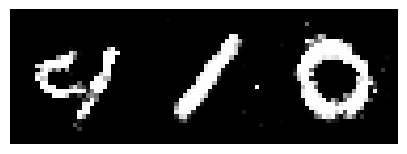

In [10]:
import torch
import torchvision.utils as vutils
import matplotlib.pyplot as plt

# Assuming the generator is already trained
latent_dim = 100  # Same latent space dimension as used during training
num_images = 3 # Number of images to generate

# Generate random latent vectors (noise) for fake image generation
z = torch.randn(num_images, latent_dim)

# Generate images from the random noise
generated_images = generator(z)

# Create a grid of images
grid = vutils.make_grid(generated_images, nrow=5, normalize=True)

# Convert the grid to a numpy array and plot using matplotlib
plt.figure(figsize=(5, 5))
plt.imshow(grid.permute(1, 2, 0).detach().numpy())  # Remove the batch dimension and plot
plt.axis('off')  # Turn off axis
plt.show()
